# mohammed insurance case study

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [21]:
claim = pd.read_csv('claims.csv')
customer = pd.read_csv('cust_demographics.csv')

In [22]:
insurance = pd.merge(right = claim , left = customer , 
            right_on = 'customer_id', left_on = 'CUST_ID' , how = 'outer')

In [23]:
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [24]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   customer_id          1100 non-null   float64
 8   incident_cause       1100 non-null   object 
 9   claim_date           1100 non-null   object 
 10  claim_area           1100 non-null   object 
 11  police_report        1100 non-null   object 
 12  claim_type           1100 non-null   object 
 13  claim_amount         1035 non-null   object 
 14  total_policy_claims  1090 non-null   float64
 15  fraudulent           1100 non-null   o

In [25]:
#insurance.dtypes

In [26]:
insurance.dropna(axis = 0 , how = 'any' , inplace = True)

In [27]:
insurance[insurance.CUST_ID.isna()]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


In [28]:
insurance.isna().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [29]:
insurance['claim_date'] = pd.to_datetime(insurance.claim_date , format = '%m/%d/%Y')

In [30]:
insurance['DateOfBirth'] = pd.to_datetime(insurance.DateOfBirth , format = '%d-%b-%y')

In [31]:
insurance['claim_amount'] = insurance.claim_amount.str.lstrip('$').astype('float64')

In [32]:

insurance['DateOfBirth'] = np.where(insurance.DateOfBirth.dt.year > 2022 
                        ,insurance.DateOfBirth + pd.DateOffset(years = -100) , insurance.DateOfBirth)

In [33]:
insurance.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
customer_id                   float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [34]:
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No
1088,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No
1089,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1090,11256802.0,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


In [37]:
# (4)
insurance['flag'] = np.where(insurance.police_report == 'Yes',1,np.where(insurance.police_report == 'No',0,np.nan))

In [42]:
# (5)


In [43]:
insurance.groupby('CUST_ID').claim_type.sum().reset_index(drop=True).drop_duplicates(keep='last')

207     Injury onlyMaterial and injury
833           Material onlyInjury only
845         Material onlyMaterial only
999                        Injury only
1000               Material and injury
1003                     Material only
Name: claim_type, dtype: object

In [44]:
# (6)

In [45]:
sixth_wala = insurance.select_dtypes(include = 'object')
sixth_wala

,gender,State,Contact,Segment,incident_cause,claim_area,police_report,claim_type,fraudulent
0,Female,VT,789-916-8172,Platinum,Driver error,Auto,No,Material only,No
1,Female,ME,265-543-1264,Silver,Crime,Home,Unknown,Material only,No
2,Female,TN,798-631-4758,Silver,Other driver error,Auto,No,Material only,Yes
3,Female,TN,798-631-4758,Silver,Driver error,Auto,No,Material only,No
4,Female,MA,413-187-7945,Silver,Natural causes,Auto,No,Material only,No
...,...,...,...,...,...,...,...,...,...
1087,Female,ND,459-425-4319,Platinum,Other driver error,Auto,Yes,Material only,No
1088,Female,ID,529-462-1635,Silver,Other causes,Home,No,Material only,No
1089,Male,WI,712-651-9613,Gold,Other driver error,Auto,Yes,Injury only,No
1090,Female,LA,469-345-5617,Silver,Other driver error,Auto,No,Material only,No


In [46]:
for i in sixth_wala:
    insurance[i] = insurance[i].fillna(insurance[i].mode()[0])

In [47]:
insurance['claim_amount' ] = insurance['claim_amount'].fillna(insurance.claim_amount.mean())

In [48]:
insurance['total_policy_claims'] = insurance['total_policy_claims'].fillna(insurance['total_policy_claims'].mean())

In [49]:
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0
1088,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0
1089,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0
1090,11256802.0,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0


In [50]:
# (7)


In [51]:
seven = insurance.DateOfBirth

In [52]:
insurance['age'] = (insurance.claim_date - seven).dt.days/365

In [53]:
#insurance['age_criteria'] = pd.cut(insurance.age , [ 0,18 ,30,60,70 ] , labels = ['children' , 'youth' , 'adult' , 'senior'])

In [54]:
insurance['age_criteria'] = np.where(insurance.age<18 , 'children' , np.where((insurance.age>=18) & (insurance.age<=30),'youth',
                            np.where((insurance.age>30) & (insurance.age<=60) , 'adult', np.where(insurance.age>60 ,'senior' , 'NaN'))))                                             


In [55]:
#insurance['age_criteria'] = np.where(insurance.age > 60 , 'senior' , np.where((insurance.age>30) & (insurance.age<=60),'adult',
#                            np.where((insurance.age<=30) & (insurance.age>18) , 'youth', 'children'))                                             
#

In [56]:
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_criteria
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,38.901370,adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN,48.753425,adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0,33.920548,adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0,34.087671,adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0,32.150685,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0,37.504110,adult
1088,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0,20.852055,youth
1089,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0,27.112329,youth
1090,11256802.0,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0,52.523288,adult


In [57]:
insurance.age_criteria = insurance.age_criteria.fillna('adult')

In [58]:
insurance

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_criteria
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,38.901370,adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN,48.753425,adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0,33.920548,adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0,34.087671,adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0,32.150685,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0,37.504110,adult
1088,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0,20.852055,youth
1089,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0,27.112329,youth
1090,11256802.0,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0,52.523288,adult


In [59]:
# (8)
insurance.groupby('Segment').claim_amount.mean()

Segment
Gold        12723.927954
Platinum    12397.859420
Silver      12217.995298
Name: claim_amount, dtype: float64

In [60]:
# (9)

In [61]:
a = '10 sep 2018'
new_date = pd.to_datetime(a)
new_date

Timestamp('2018-09-10 00:00:00')

In [62]:
round(insurance[insurance.claim_date < new_date].groupby('incident_cause').claim_amount.sum(),2)

incident_cause
Crime                  662110.0
Driver error          3168250.0
Natural causes        1183331.5
Other causes          3486969.0
Other driver error    3053360.0
Name: claim_amount, dtype: float64

In [63]:
# (10)
tenth = insurance.loc[(insurance.State == 'TX') | (insurance.State == 'DE') | (insurance.State == 'AK')]

In [64]:
tenth_wala = tenth[(tenth.incident_cause == 'Driver error') | (tenth.incident_cause == 'Other driver error')]

In [65]:
tenth_wala[tenth_wala.age_criteria == 'adult'].groupby('State').State.count()

State
AK    7
DE    7
TX    6
Name: State, dtype: int64

In [66]:
# (11)


In [67]:
eleven = round(insurance.pivot_table(index = 'Segment' , columns = 'gender' , values = 'claim_amount' , aggfunc= 'sum'),2).T
eleven

Segment,Gold,Platinum,Silver
gender,,,
Female,1937899.0,2278700.0,1739832.0
Male,2477304.0,1998561.5,2157708.5


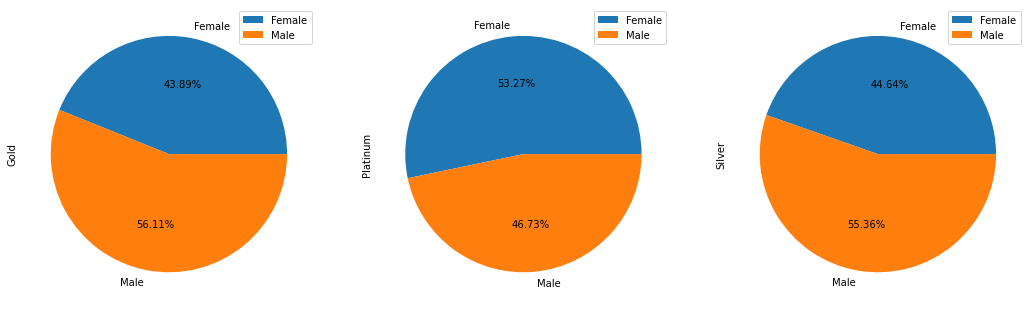

In [68]:
eleven.plot( kind = 'pie' , subplots = True , autopct='%.2f%%' , figsize = (18,25))
plt.show()

In [69]:
abcd = eleven.sum(axis = 0)
abcd

Segment
Gold        4415203.0
Platinum    4277261.5
Silver      3897540.5
dtype: float64

In [70]:
eleven_wala = eleven.div(abcd,axis = 1)* 100
eleven_wala

Segment,Gold,Platinum,Silver
gender,,,
Female,43.891504,53.274741,44.639228
Male,56.108496,46.725259,55.360772


In [71]:
# (12)

In [72]:
tw = round(insurance[(insurance.incident_cause == 'Driver error')|(insurance.incident_cause == 'Other driver error')].groupby('gender').claim_amount.sum(),0)


<AxesSubplot:xlabel='gender'>

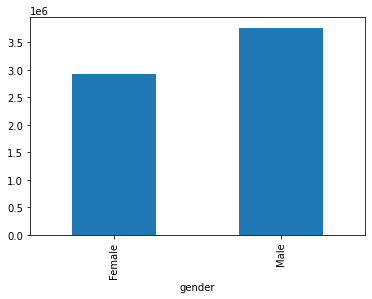

In [73]:
tw.plot(kind = 'bar')

In [74]:
# (13)

In [75]:
thirteen = insurance[insurance.fraudulent == 'Yes'].groupby('age_criteria').age_criteria.count()
thirteen

age_criteria
adult       163
children      1
youth        66
Name: age_criteria, dtype: int64

<AxesSubplot:xlabel='age_criteria'>

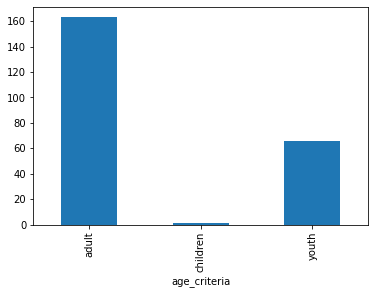

In [76]:
thirteen.plot(kind = 'bar')

In [77]:
# (14)

In [78]:
insurance['month'] = insurance['claim_date'].dt.strftime('%B')

### question 14

In [79]:
insurance['month_year'] = insurance.claim_date.apply(lambda x : x.strftime('%m'))

In [80]:
fourteen = insurance.groupby('month_year').claim_amount.sum().reset_index()

In [81]:
fourteen

,month_year,claim_amount
0,01,1243588.5
1,02,1101455.0
2,03,1237921.5
3,04,1266570.5
4,05,1014447.5
5,06,1204020.0
6,07,1266800.5
7,08,833982.0
8,09,814963.0
9,10,1347931.5


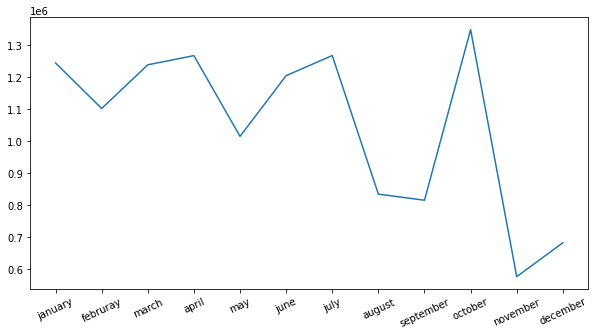

In [82]:
values = ['january','februray','march','april','may','june','july','august','september','october','november','december']
plt.figure(figsize= (10,5))
plt.plot(fourteen.month_year , fourteen.claim_amount)
plt.xticks(fourteen.month_year,values,rotation = 25)
plt.show()

### question 15

In [83]:
qs = insurance.pivot_table(index = ['gender','age_criteria'] , columns = 'fraudulent' , values = 'claim_amount' , aggfunc=np.mean).reset_index()
qs

fraudulent,gender,age_criteria,No,Yes
0,Female,adult,12398.392157,12461.482143
1,Female,children,11210.000000,NaN
2,Female,youth,12311.229508,6990.203125
3,Male,adult,12036.939502,17294.689873
4,Male,children,22615.000000,32407.000000
5,Male,youth,12187.094017,9886.955882


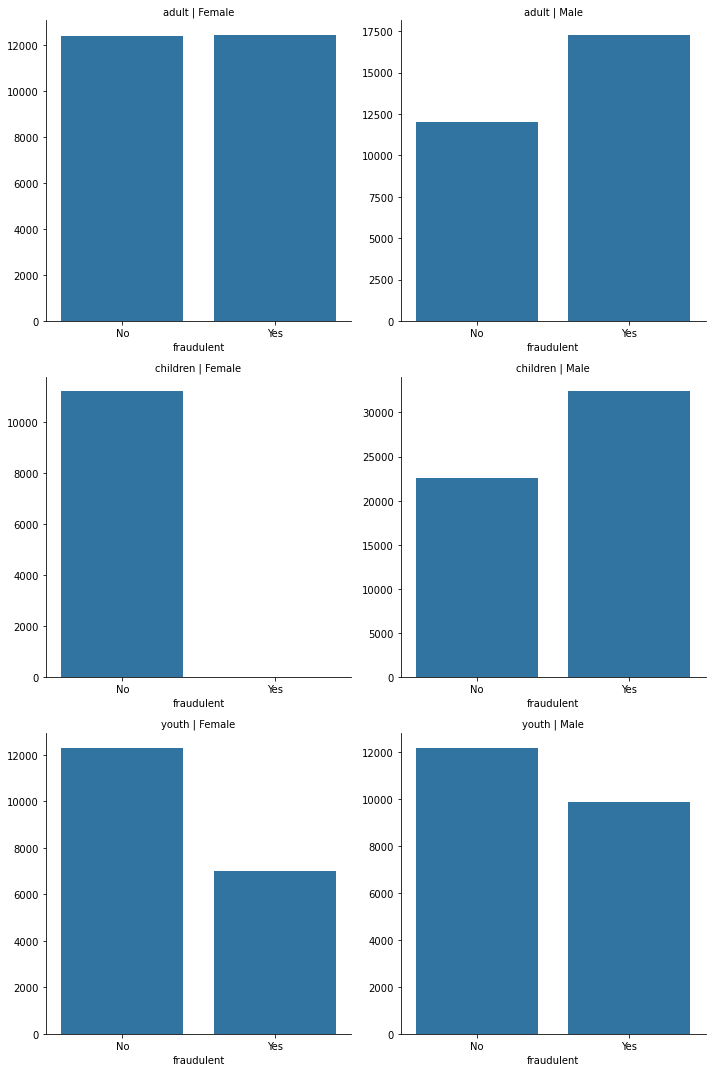

In [84]:
vb = sns.FacetGrid(qs , row = 'age_criteria' ,col = 'gender' , sharey= False , sharex= False , height=5 )
vb.map_dataframe(sns.barplot , )
vb.set_titles(col_template= '{col_name}' , row_template= '{row_name}')

In [85]:
# (16)

In [86]:
print( 'min' , insurance.claim_amount.min())
print( 'max' , insurance.claim_amount.max())
print( 'one percentile' , insurance.claim_amount.quantile(0.01))
print( 'ninetynine percentile' , insurance.claim_amount.quantile(0.99))
print(insurance.claim_amount.isna().sum())

min 1000.0
max 48150.5
one percentile 1040.0
ninetynine percentile 44648.74999999999
0


In [87]:
insurance.claim_amount.clip(lower = insurance.claim_amount.quantile(0.01) , upper = insurance.claim_amount.quantile(0.99),inplace = True)

In [88]:
m = insurance.loc[insurance.gender == 'Male' , 'claim_amount']
f = insurance.loc[insurance.gender == 'Female' , 'claim_amount']

In [89]:
print(m.mean() , f.mean())

12841.286821705426 12009.190404040404


In [90]:
stats.ttest_ind(m,f)

Ttest_indResult(statistic=0.963796330225937, pvalue=0.3353789718963972)

In [91]:
import scipy.stats as stats

In [92]:
stats.f_oneway(m,f)

F_onewayResult(statistic=0.9289033661569858, pvalue=0.33537897189651544)

In [93]:
# (17)

In [94]:
print(insurance.Segment.isna().sum())
print(insurance.age_criteria.isna().sum())

0
0


In [95]:
insurance.Segment.value_counts()

Gold        347
Platinum    345
Silver      319
Name: Segment, dtype: int64

In [96]:
seventeen = pd.crosstab(index = insurance.Segment , columns = insurance.age_criteria)
seventeen

age_criteria,adult,children,youth
Segment,,,
Gold,247,3,97
Platinum,227,4,114
Silver,225,0,94


In [97]:
stats.chi2_contingency(seventeen)

(5.861827466483263,
 0.20970744632473004,
 4,
 array([[239.91394659,   2.40257171, 104.6834817 ],
        [238.53115727,   2.38872404, 104.08011869],
        [220.55489614,   2.20870425,  96.2363996 ]]))

In [98]:
# (18)

In [99]:
print( 'min' , insurance.claim_amount.min())
print( 'max' , insurance.claim_amount.max())
print( 'one percentile' , insurance.claim_amount.quantile(0.01))
print( 'ninetynine percentile' , insurance.claim_amount.quantile(0.99))
print(insurance.claim_amount.isna().sum())
print("therefore no outliers")

min 1040.0
max 44648.74999999999
one percentile 1040.0
ninetynine percentile 44633.22499999999
0
therefore no outliers


In [100]:
stats.ttest_1samp(insurance.claim_amount,10000)

Ttest_1sampResult(statistic=5.639620363950332, pvalue=2.211537804922098e-08)

In [101]:
# (19)
insurance.age_criteria.value_counts()

adult       699
youth       305
children      7
Name: age_criteria, dtype: int64

In [102]:
nine = insurance.loc[insurance.age_criteria == 'adult','claim_amount']

In [103]:
nine_1 = insurance.loc[insurance.age_criteria == 'youth','claim_amount']

In [104]:
nine_2 = insurance.loc[insurance.age_criteria == 'children','claim_amount']


In [105]:
print(nine.mean(),nine_1.mean()  , nine_2.mean())

12787.355150214593 11432.803278688525 20755.285714285714


In [106]:
stats.f_oneway(nine,nine_1,nine_2)

F_onewayResult(statistic=2.3367982617769396, pvalue=0.09715985562473714)

In [107]:
# (20)

In [108]:
stats.pearsonr(insurance.claim_amount , insurance.total_policy_claims)

(-0.01904075149550906, 0.545358483977353)